In [1]:
import matplotlib.pyplot as plt
import numpy as np
import timml

import ttim

plt.rcParams["figure.figsize"] = (10, 4)

### Example strip area-sink

In [2]:
k = [20.0]
H = 10.0
Saq = [0.1]
L = 100.0
N = 1e-3
z = [0, -H]

In [3]:
ml = ttim.ModelMaq(
    kaq=k,
    z=z,
    Saq=Saq,
    # c=c,
    tmin=0.1,
    tmax=1e3,
    topboundary="conf",
    phreatictop=True,
    #M=1
)

left = ttim.StripInhomMaq(
    ml,
    -np.inf,
    -L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    # c=c,
    topboundary="conf",
    phreatictop=True,
)
inf = ttim.StripInhomMaq(
    ml,
    -L / 2,
    L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    # c=c,
    topboundary="conf",
    phreatictop=True,
    tsandN=[(0.0, N)],
)
right = ttim.StripInhomMaq(
    ml,
    L / 2,
    np.inf,
    kaq=k,
    z=z,
    Saq=Saq,
    # c=c,
    topboundary="conf",
    phreatictop=True,
)

ml.solve()

self.neq  4
solution complete


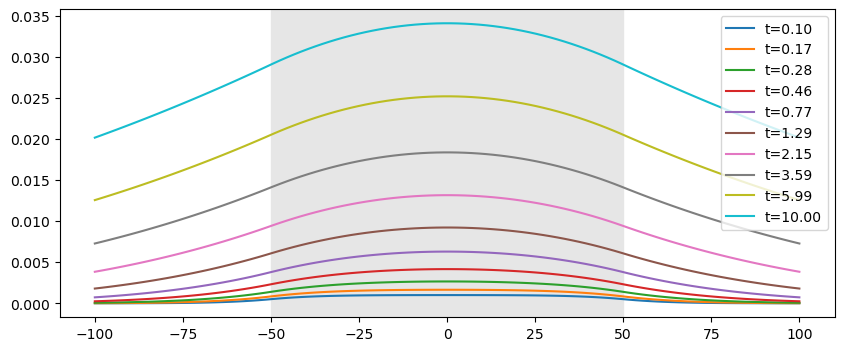

In [4]:
x = np.linspace(-100, 100, 100)
y = np.zeros(100)
plt.axvspan(-50, 50, color=3 * [.9])
for t in np.logspace(-1, 1, 10):
    h = ml.headalongline(x, y, t)
    plt.plot(x, h[0, 0], label=f't={t:.2f}')
plt.legend();